In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn  import tree 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
import numpy as np
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score


In [48]:
data = pd.read_csv("Name.csv")
data.head()

,Unnamed: 0,PassengerId,t,Survived,Pclass,Name,Family members,Age,Ticket,Fare,female,male,C,Q,S
0,0,1,Mr,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,1,0,0,1
1,1,2,Mrs,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,1,0,1,0,0
2,2,3,Miss,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,3,4,Mrs,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,1,0,0,0,1
4,4,5,Mr,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,0,1,0,0,1


### drop the name column 

In [49]:
data=data.drop('Name', 1)
data.head()

,Unnamed: 0,PassengerId,t,Survived,Pclass,Family members,Age,Ticket,Fare,female,male,C,Q,S
0,0,1,Mr,0,3,1,22.0,A/5 21171,7.2500,0,1,0,0,1
1,1,2,Mrs,1,1,1,38.0,PC 17599,71.2833,1,0,1,0,0
2,2,3,Miss,1,3,0,26.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,3,4,Mrs,1,1,1,35.0,113803,53.1000,1,0,0,0,1
4,4,5,Mr,0,3,0,35.0,373450,8.0500,0,1,0,0,1


# Training set and Testing set Apply decision tree. 

In [50]:
X = data[['Pclass', 'Family members',
       'Age', 'Fare', 'female', 'male', 'C', 'Q', 'S']]
y = data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2 , random_state=40)


In [51]:
classifier = tree.DecisionTreeClassifier('gini','best')
classifier.fit(X_train,y_train)
print ('Score:{}'.format(classifier.score(X_test,y_test)))

Score:0.7597765363128491


# Apply logistic regression 

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print ('accuracy = { :.2f}',format(logreg.score(X_test,y_test)))


accuracy = { :.2f} 0.8156424581005587


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Apply Support Vector Machine

In [53]:
svm = svm.SVC(decision_function_shape='ovo')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
f1_score(y_test, y_pred, average='macro')


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7108425949857845

# Applay KNN

In [54]:
classifierr = KNeighborsClassifier(n_neighbors=3)
classifierr.fit(X_train, y_train)
print ('accuracy = { :.3f}',format(classifierr.score(X_test,y_test)))

accuracy = { :.3f} 0.7541899441340782


# Applay Voting classifier 

In [55]:
clf_voting = VotingClassifier(estimators=[('dt',classifier),('lg',logreg),('knn',classifierr)])

In [56]:
clf_voting.fit(X_train,y_train)
y_pred=clf_voting.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("accuracy = { :2.f}  ",format(acc))

accuracy = { :2.f}   0.8603351955307262


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
clf_voting.predict([[1,2,45,55.000,0,1,0,0,1]])

array([0], dtype=int64)

In [58]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       103
           1       0.84      0.83      0.83        76

   micro avg       0.86      0.86      0.86       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.86      0.86      0.86       179



In [59]:
clf_bag = BaggingClassifier ( 
base_estimator=logreg,
    n_estimators=20
)

In [60]:
clf_bag.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [61]:
pred=clf_bag.predict(X_test)

In [62]:
print (accuracy_score(y_test,pred))

0.8156424581005587


# Plot  decision tree

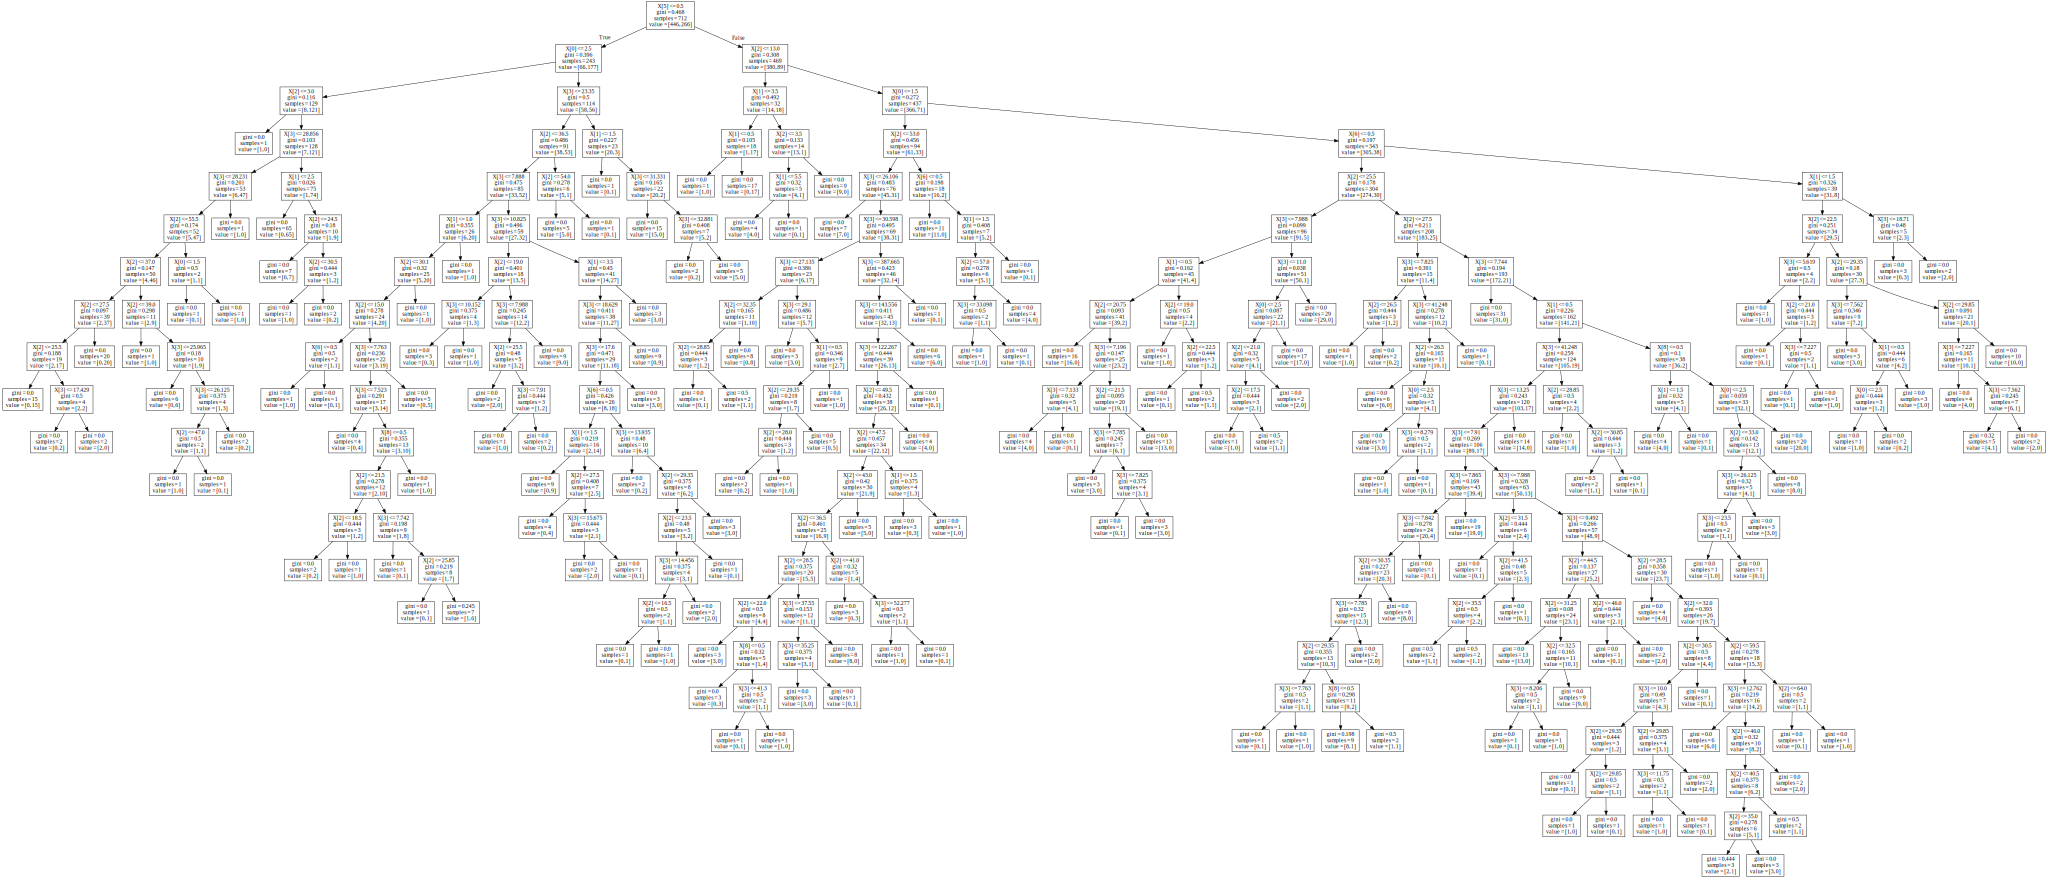

In [63]:
import graphviz 
data = tree.export_graphviz (classifier,out_file=None)
graph = graphviz.Source(data)
graph.render("data")
graph

In [64]:
classifier = tree.DecisionTreeClassifier('gini','random',max_depth=5)
classifier.fit(X_train,y_train)
print ('Score:{}'.format(classifier.score(X_test,y_test)))

Score:0.8100558659217877


In [65]:
print ('Score:{}'.format(classifier.score(X_test,y_test)))

Score:0.8100558659217877
